<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [160]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from tqdm.notebook import tqdm

In [161]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train,Y_train,test_size=0.25, random_state=0)

In [163]:
svm_clf = SVC(kernel='rbf', gamma=0.001, C=100, random_state = 0)
svm_clf.fit(X_train,Y_train)

SVC(C=100, gamma=0.001, random_state=0)

In [164]:
support_vectors = svm_clf.support_vectors_
intercept = svm_clf.intercept_
y_i_alpha_i = svm_clf.dual_coef_      #dual_coef_ = y_i*alpha_i

In [165]:
def decision_function(X_cv,gamma):
    decision=[]
    for x_q in X_cv:
        decision_fun = 0
        for i in range(len(support_vectors)):
            k = np.exp(-gamma*((np.linalg.norm(support_vectors[i]-x_q))**2))  #k = exp(-gamma ||x_i - x_q||^2)
            decision_fun = decision_fun + (y_i_alpha_i[0,i]*k)
        decision_fun = decision_fun + intercept
        decision.append(decision_fun)
    return np.array(decision)

In [166]:
f_cv = decision_function(X_cv, 0.001)   #gamma = 0.001

In [167]:
f_cv = f_cv[:,0]

In [168]:
f_cv.shape

(1000,)

In [169]:
f_cv

array([-4.16849194e+00, -2.34894292e+00, -7.75767116e-01,  1.86859998e+00,
        1.05466075e+00, -2.20643803e+00, -1.28060150e+00, -3.25420095e+00,
       -2.24829480e-01,  1.03902965e-01, -3.16532463e+00, -2.03106676e+00,
       -2.02504137e+00, -2.35177029e+00, -3.18361576e+00, -2.05109166e+00,
       -1.53876582e+00, -1.69240186e+00,  1.65243447e+00, -1.09625346e+00,
        1.02338767e+00, -1.53430697e+00, -2.33920116e+00,  5.18458451e-01,
       -3.19610556e+00,  6.18589817e-01, -2.98274764e+00,  7.05536018e-02,
       -1.53914038e-01,  1.71592358e+00, -2.25508890e+00,  1.95288295e+00,
       -1.70628594e+00, -3.65295851e+00, -2.81932287e+00,  1.82775238e+00,
       -2.26225632e+00, -1.96585813e+00, -1.88925705e+00, -7.10400139e-01,
       -1.75454813e+00, -2.29105560e+00, -1.10961485e+00,  1.31582783e+00,
       -1.11547834e+00, -7.69598754e-01, -3.19636658e-01,  1.84646153e+00,
       -2.08098129e+00, -1.74515203e+00, -6.15279613e-01, -3.40574850e+00,
       -2.70457611e+00, -

In [170]:
sklearn_decision_fun = svm_clf.decision_function(X_cv)

In [171]:
sklearn_decision_fun.shape

(1000,)

In [172]:
sklearn_decision_fun

array([-4.16849194e+00, -2.34894292e+00, -7.75767116e-01,  1.86859998e+00,
        1.05466075e+00, -2.20643803e+00, -1.28060150e+00, -3.25420095e+00,
       -2.24829480e-01,  1.03902965e-01, -3.16532463e+00, -2.03106676e+00,
       -2.02504137e+00, -2.35177029e+00, -3.18361576e+00, -2.05109166e+00,
       -1.53876582e+00, -1.69240186e+00,  1.65243447e+00, -1.09625346e+00,
        1.02338767e+00, -1.53430697e+00, -2.33920116e+00,  5.18458451e-01,
       -3.19610556e+00,  6.18589817e-01, -2.98274764e+00,  7.05536018e-02,
       -1.53914038e-01,  1.71592358e+00, -2.25508890e+00,  1.95288295e+00,
       -1.70628594e+00, -3.65295851e+00, -2.81932287e+00,  1.82775238e+00,
       -2.26225632e+00, -1.96585813e+00, -1.88925705e+00, -7.10400139e-01,
       -1.75454813e+00, -2.29105560e+00, -1.10961485e+00,  1.31582783e+00,
       -1.11547834e+00, -7.69598754e-01, -3.19636658e-01,  1.84646153e+00,
       -2.08098129e+00, -1.74515203e+00, -6.15279613e-01, -3.40574850e+00,
       -2.70457611e+00, -

In [173]:
np.subtract(f_cv,sklearn_decision_fun)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.42108547e-14,  

As shown above, the values we got as fcv are equal to outputs of clf.decision_function(Xcv)

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [174]:
#Sigmoid function
def sigmoid(w,x,b):
    val=1/(1+np.exp(-(np.dot(x,w.T)+b)))
    return val

In [175]:
#Log Loss function
# Log loss= -((1/N)*[(y*log(p))+((1-y)*log(1-p))])
def log_loss_fun(w,x,b,y):
    sigmoid_val=sigmoid(w,x,b)
    first_term=y*np.log10(sigmoid_val)
    second_term=(1-y)*np.log10(1-sigmoid_val)
    val=-((first_term+second_term)/(len(x)))
    return np.sum(val)

In [176]:
class_one = list(Y_train).count(1)
class_zero = list(Y_train).count(0)
Y_plus = (class_one+1)/(class_one+2)
Y_minus = 1/(class_zero+2)

In [177]:
def convert(Y_cv, Y_plus, Y_minus):
    Y_probabilities = []
    for p in Y_cv:
        if p==1:
            Y_probabilities.append(Y_plus)
        else:
            Y_probabilities.append(Y_minus)
    return (np.array(Y_probabilities))

In [178]:
modified_Y_cv = convert(Y_cv, Y_plus, Y_minus)

In [179]:
w = np.zeros_like(f_cv[0])
b = 0
eta0  = 0.0001
alpha = 0.0001

In [180]:
def SGD(w,b,epoch,x,y):
    log_loss_test=[]
    N=len(x)
    #Calculate initial log loss and storing the values
    loss = log_loss_fun(w,x,b,y)
    log_loss_test.append(loss)
    
    for epo in tqdm(range(epoch)):
        for i in range(N):
            w= ((1-(alpha*eta0)/N)*w)+((alpha*x[i])*(y[i]-sigmoid(w,x[i],b)))
            b= (b+(alpha*(y[i]-sigmoid(w,x[i],b))))
        log_loss_value=log_loss_fun(w,x,b,y)
        log_loss_test.append(log_loss_value)
        if abs((np.sum(log_loss_test[epo+1]-log_loss_test[epo])))<=0.0001:
            print('Updation is completed in {} epochs'.format(epo+1))
            break
        
    return w,b,log_loss_test,epo+1

In [181]:
epochs = 50
updated_w,updated_b,loss,convergence_epoch=SGD(w,b,epochs,f_cv,modified_Y_cv) 
print("Weight = {}".format(updated_w))
print("Intercept = {}".format(updated_b))

  0%|          | 0/50 [00:00<?, ?it/s]

Weight = 1.184267476983368
Intercept = -0.1822208677249477


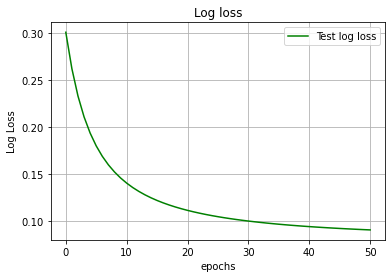

In [182]:
import matplotlib.pyplot as plt

plt.grid()
plt.plot(range(0,convergence_epoch+1),loss, label='Test log loss', color='green')

plt.ylabel('Log Loss')
plt.xlabel('epochs')
plt.title('Log loss')
plt.legend()
plt.show()

In [183]:
f_test = decision_function(X_test, 0.001)

In [184]:
X_test.shape

(1000, 5)

In [185]:
def y_probability(f_test, w , b):
    return( 1/(1+np.exp(-((w*f_test)+b))))   

In [186]:
probability = y_probability(f_test, updated_w, updated_b)
print(probability.shape,X_test.shape)
print(probability)

(1000, 1) (1000, 5)
[[0.01262322]
 [0.46940552]
 [0.09651724]
 [0.41851855]
 [0.02470306]
 [0.88431542]
 [0.16385135]
 [0.07638482]
 [0.02071759]
 [0.56463955]
 [0.03081982]
 [0.01050195]
 [0.0534045 ]
 [0.1865744 ]
 [0.03071843]
 [0.05552609]
 [0.89493573]
 [0.01318206]
 [0.41970536]
 [0.84213036]
 [0.02981803]
 [0.00651219]
 [0.0221213 ]
 [0.17164855]
 [0.91049066]
 [0.05112621]
 [0.93710456]
 [0.6820769 ]
 [0.91331786]
 [0.00587501]
 [0.0282128 ]
 [0.12561209]
 [0.05318615]
 [0.94147379]
 [0.06528372]
 [0.03635586]
 [0.04302474]
 [0.75675576]
 [0.84509843]
 [0.03885849]
 [0.8536512 ]
 [0.06226393]
 [0.21886066]
 [0.45666384]
 [0.04748563]
 [0.01860947]
 [0.92620061]
 [0.80418692]
 [0.0451785 ]
 [0.850272  ]
 [0.05368172]
 [0.7351585 ]
 [0.92216094]
 [0.02948527]
 [0.08545239]
 [0.62503758]
 [0.01351366]
 [0.81132787]
 [0.00654762]
 [0.04757109]
 [0.84289026]
 [0.91552458]
 [0.28237795]
 [0.4024851 ]
 [0.81459771]
 [0.68640267]
 [0.28732848]
 [0.07684237]
 [0.76444472]
 [0.19808065]
